# Linear Regression:


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

## Swaptions Performance Data

In [10]:
data = pd.read_csv('swaptions_perf.csv')
data.info()

data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 33 columns):
Configuration           200 non-null object
ACYC                    200 non-null float64
AFREQ                   200 non-null float64
C0res%                  200 non-null float64
C10res%                 200 non-null int64
C1res%                  200 non-null float64
C2res%                  200 non-null int64
C3res%                  200 non-null int64
C4res%                  200 non-null int64
C5res%                  200 non-null int64
C6res%                  200 non-null int64
C7res%                  200 non-null int64
C8res%                  200 non-null int64
C9res%                  200 non-null int64
EXEC                    200 non-null float64
FREQ                    200 non-null float64
INST                    200 non-null float64
INSTnom                 200 non-null float64
INSTnom%                200 non-null float64
IPC                     200 non-null float64
L2HIT         

,Configuration,ACYC,AFREQ,C0res%,C10res%,C1res%,C2res%,C3res%,C4res%,C5res%,...,L3HIT,L3MISS,L3MPI,PhysIPC,PhysIPC%,Proc Energy (Joules),READ,TIME(ticks),WRITE,Slowdown
0,num-800000,1100000.0,1.010,97.4,0,2.640,0,0,0,0,...,0.669,168.0,0.000118,2.60,64.9,2190.0,123.0,139000.0,133.0,1.410587
1,num-800000,1160000.0,1.010,99.5,0,0.531,0,0,0,0,...,0.484,308.0,0.000222,2.39,59.9,2260.0,162.0,145000.0,229.0,1.467809
2,num-800000,872000.0,1.010,85.5,0,14.100,0,0,0,0,...,0.486,218.0,0.000205,2.44,60.9,1890.0,142.0,126000.0,239.0,1.282362
3,num-800000,1170000.0,1.010,99.8,0,0.180,0,0,0,0,...,0.492,264.0,0.000192,2.35,58.7,2260.0,158.0,146000.0,259.0,1.476710
4,num-800000,1030000.0,1.010,94.5,0,5.470,0,0,0,0,...,0.449,277.0,0.000221,2.42,60.5,2110.0,145.0,136000.0,230.0,1.374245
5,num-800000,1080000.0,1.010,96.9,0,3.050,0,0,0,0,...,0.593,204.0,0.000146,2.58,64.5,2180.0,135.0,138000.0,150.0,1.400489
6,num-800000,653000.0,1.010,66.4,0,32.600,0,0,0,0,...,0.631,234.0,0.000304,2.37,59.1,1620.0,185.0,121000.0,186.0,1.230531
7,num-800000,1180000.0,0.941,99.8,0,0.186,0,0,0,0,...,0.412,305.0,0.000224,2.30,57.6,2050.0,169.0,157000.0,297.0,1.594793
8,num-800000,1110000.0,1.010,96.1,0,3.770,0,0,0,0,...,0.584,371.0,0.000345,1.95,48.7,2170.0,295.0,143000.0,318.0,1.442963
9,num-800000,1170000.0,0.961,99.8,0,0.241,0,0,0,0,...,0.416,333.0,0.000248,2.30,57.4,2120.0,174.0,152000.0,288.0,1.543912


Here, Slowdown is considered as the dependent variable and the rest as independent variables. So the Slowdown needs to be predicted given the independent variables.

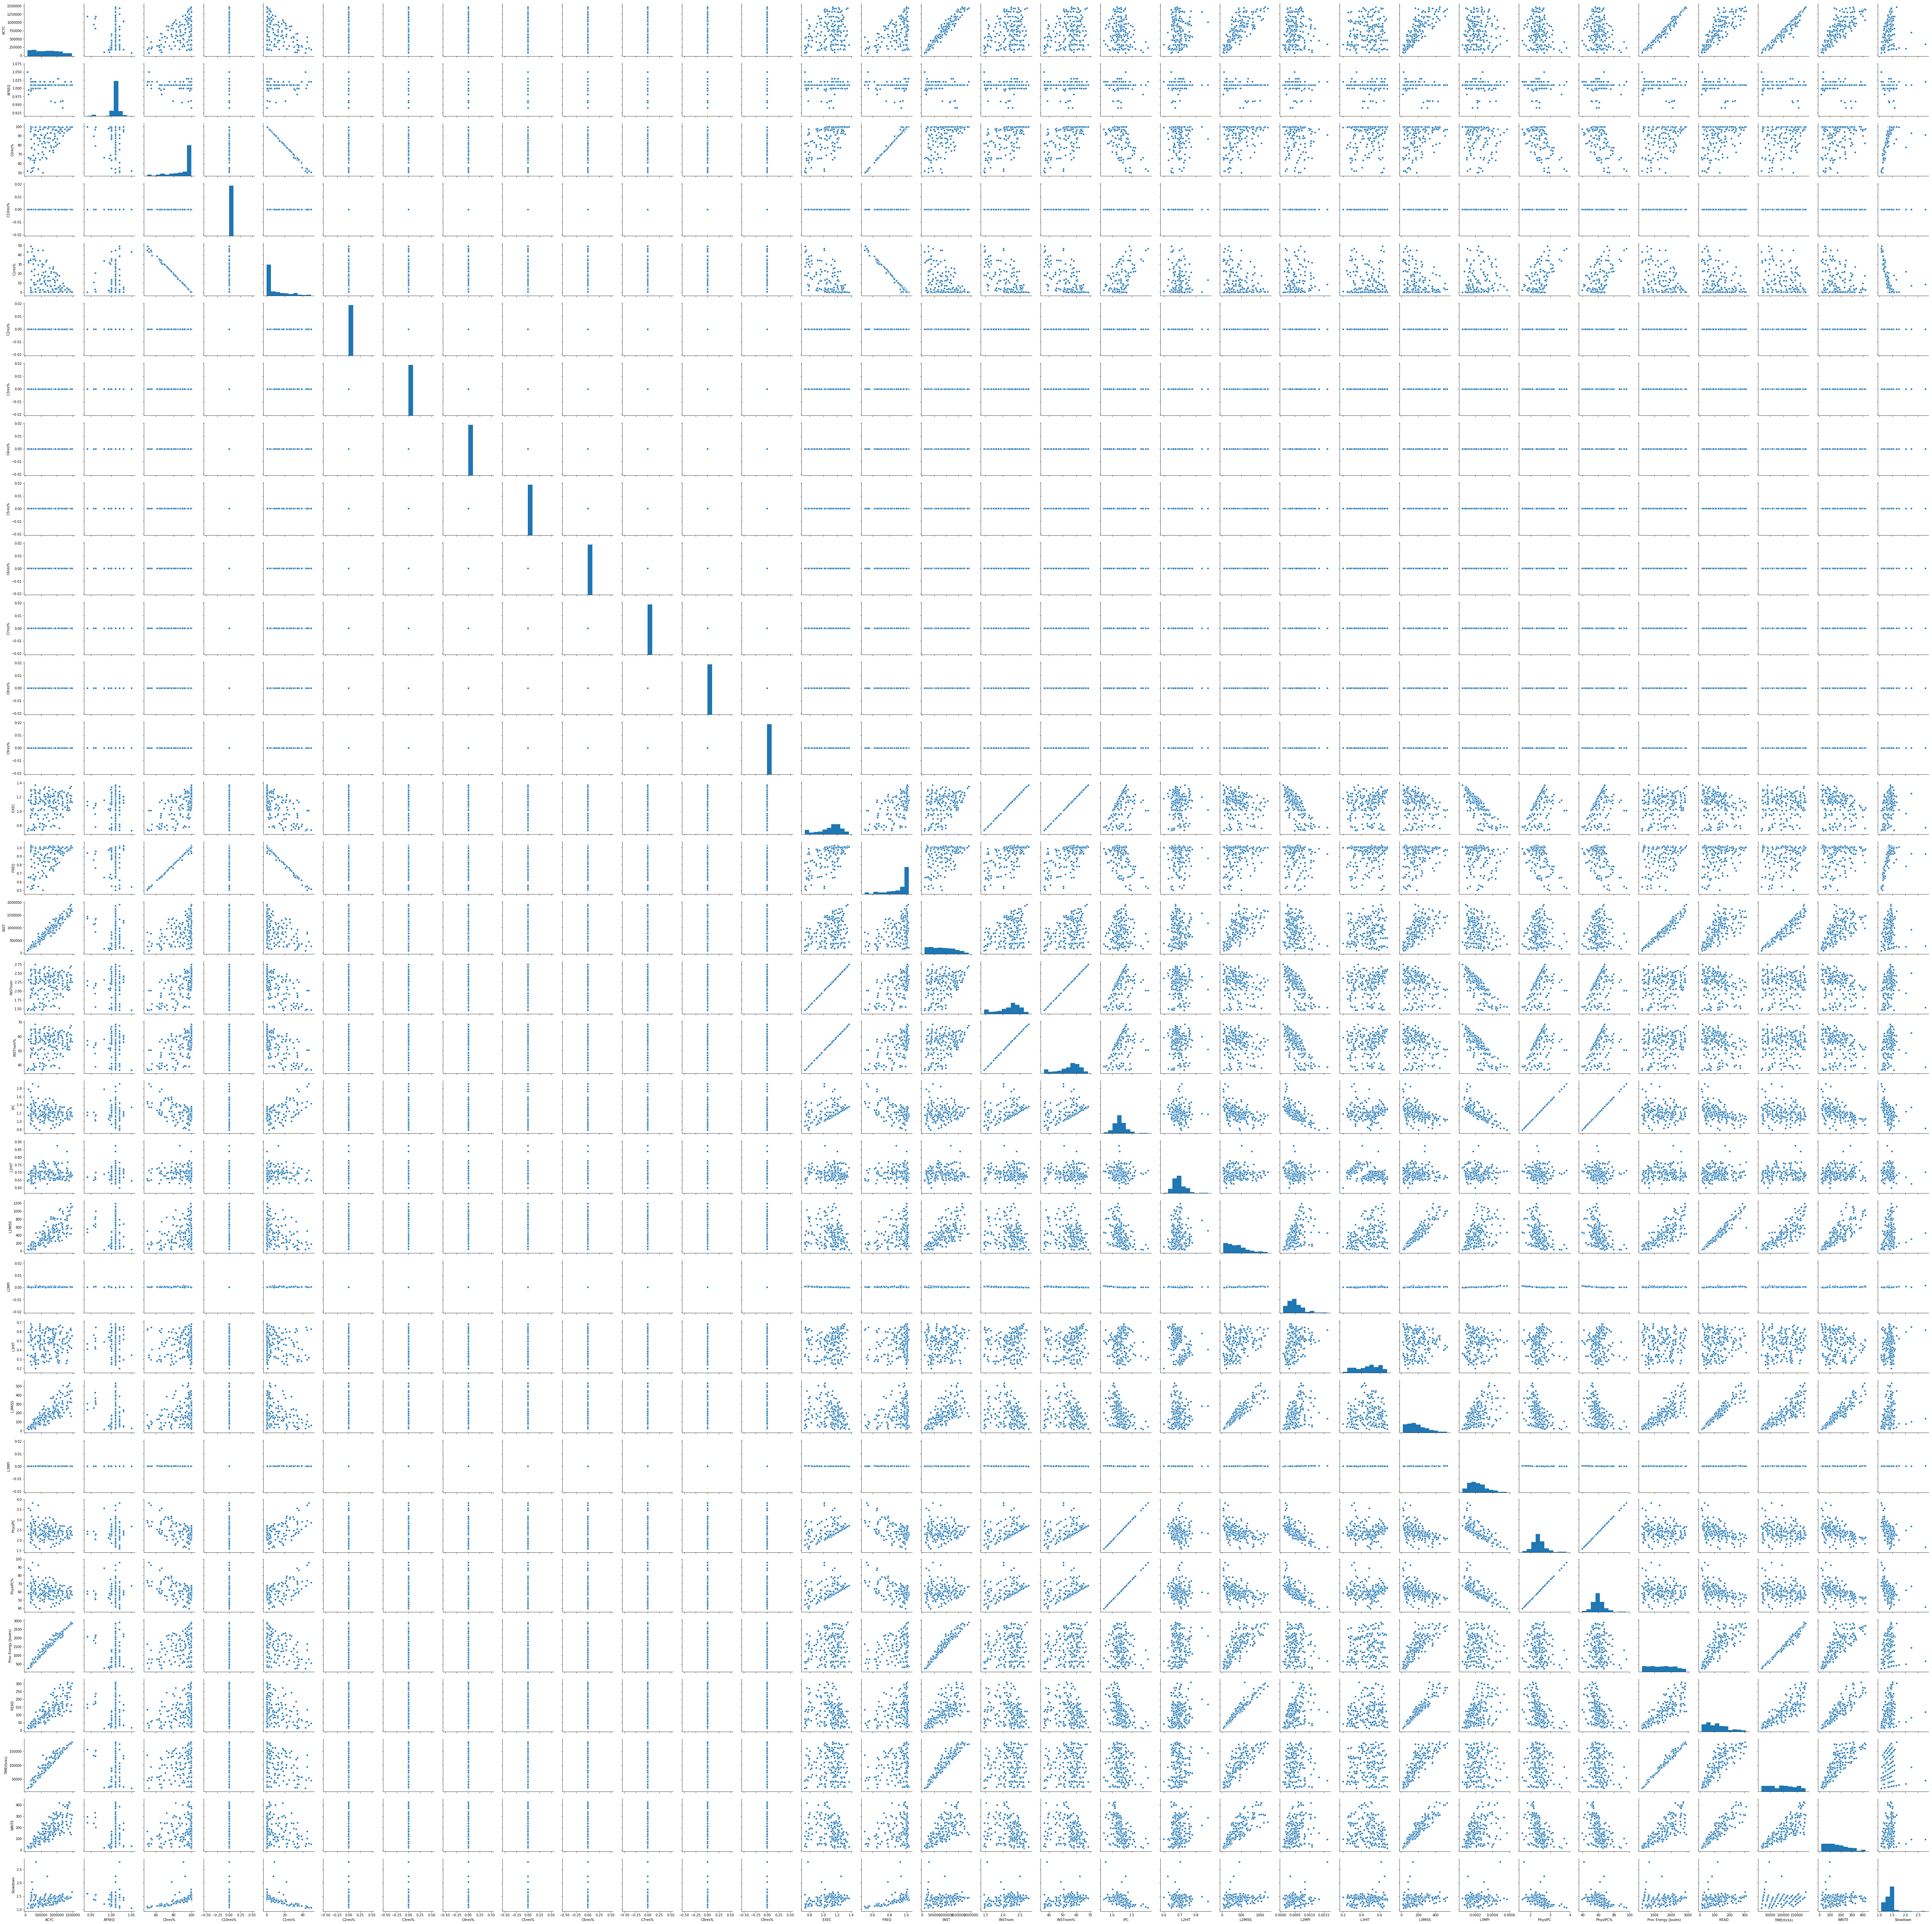

In [11]:
sns.pairplot(data)

/home/rajanya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


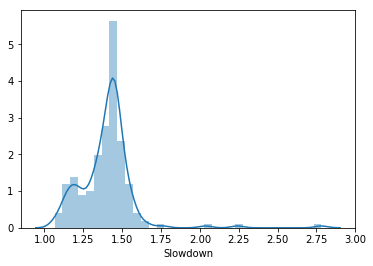

In [12]:
sns.distplot(data['Slowdown'])

In [13]:
data.corr()

,ACYC,AFREQ,C0res%,C10res%,C1res%,C2res%,C3res%,C4res%,C5res%,C6res%,...,L3HIT,L3MISS,L3MPI,PhysIPC,PhysIPC%,Proc Energy (Joules),READ,TIME(ticks),WRITE,Slowdown
ACYC,1.000000,-0.144995,0.381407,NaN,-0.380940,NaN,NaN,NaN,NaN,NaN,...,0.109928,0.827667,-0.016988,-0.199762,-0.200127,0.986417,0.827369,0.972863,0.816516,0.212850
AFREQ,-0.144995,1.000000,-0.067065,NaN,0.061462,NaN,NaN,NaN,NaN,NaN,...,-0.030154,-0.167310,-0.018424,0.014605,0.014484,-0.097572,-0.139938,-0.169027,-0.153436,-0.096764
C0res%,0.381407,-0.067065,1.000000,NaN,-0.999015,NaN,NaN,NaN,NaN,NaN,...,0.113430,0.196184,-0.138661,-0.477295,-0.476906,0.258359,0.193716,0.189661,0.164844,0.592275
C10res%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1res%,-0.380940,0.061462,-0.999015,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,-0.116655,-0.195657,0.135639,0.482275,0.481837,-0.257567,-0.194677,-0.189188,-0.164080,-0.594256
C2res%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3res%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C4res%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C5res%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C6res%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Training a Linear Regression Model

In [14]:
X = data[['ACYC','AFREQ','C0res%','C10res%','C1res%','C2res%','C3res%','C4res%','C5res%','C6res%','C7res%','C8res%',
            'C9res%','EXEC','FREQ','INST','INSTnom','INSTnom%','IPC','L2HIT','L2MISS','L2MPI','L3HIT','L3MISS','L3MPI',
            'PhysIPC','PhysIPC%','Proc Energy (Joules)','READ','TIME(ticks)','WRITE']]
y = data['Slowdown']

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

### Simple linear regression:

is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
It takes the following form:
y=β0+β1x,

y  is the response,
x  is the feature,
β0  is the intercept,
β1  is the coefficient for x,

β0  and  β1  are called the model coefficients

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predictions from our Model

In [17]:
y_pred = lm.predict(X_test)

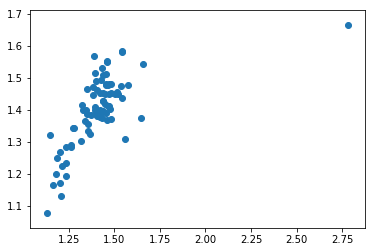

In [18]:
plt.scatter(y_test, y_pred)

In [19]:
from sklearn import metrics

# RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.1455909283932477

In [20]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred) 

0.4215227014484676

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

0.4168110920463599